<a href="https://colab.research.google.com/github/Oneriko21/WebTech/blob/main/Week3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [ ]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [ ]:
# load dataset
df = pd.read_csv("loan_prediction.csv")
# shape of df
df.shape

(614, 13)

In [ ]:
assert df.shape == (614, 13)

In [ ]:
# head of df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [ ]:
# your code here
df.drop("Loan_ID", axis=1, inplace=True)
df.replace("Y",1, inplace=True)
df.replace("N",0, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [ ]:
# your code here
stats = pd.DataFrame()
stats["names"] = df.columns
stats.set_index("names")
stats["type"] = df.dtypes.values
stats["null"] = df.isnull().sum().values
listUnique = []
for x in df.columns:
  listUnique.append(df[x].nunique())
stats["unique"] = listUnique
stats

,names,type,null,unique
0,Gender,object,13,2
1,Married,object,3,2
2,Dependents,object,15,4
3,Education,object,0,2
4,Self_Employed,object,32,2
5,ApplicantIncome,int64,0,505
6,CoapplicantIncome,float64,0,287
7,LoanAmount,float64,22,203
8,Loan_Amount_Term,float64,14,10
9,Credit_History,float64,50,2


In [ ]:
unique_values = ""
for x in df.columns:
  if(df[x].nunique() >= 10):
    for y in df[x].unique()[:20]:
      unique_values += str(y)
      unique_values += " - "
    unique_values += "..."
    unique_values += " - "
  else:  
    for y in df[x].unique():
      unique_values += str(y)
      unique_values += " - "
unique_values

'Male - Female - nan - No - Yes - nan - 0 - 1 - 2 - 3+ - nan - Graduate - Not Graduate - No - Yes - nan - 5849 - 4583 - 3000 - 2583 - 6000 - 5417 - 2333 - 3036 - 4006 - 12841 - 3200 - 2500 - 3073 - 1853 - 1299 - 4950 - 3596 - 3510 - 4887 - 2600 - ... - 0.0 - 1508.0 - 2358.0 - 4196.0 - 1516.0 - 2504.0 - 1526.0 - 10968.0 - 700.0 - 1840.0 - 8106.0 - 2840.0 - 1086.0 - 3500.0 - 5625.0 - 1911.0 - 1917.0 - 2925.0 - 2253.0 - 1040.0 - ... - nan - 128.0 - 66.0 - 120.0 - 141.0 - 267.0 - 95.0 - 158.0 - 168.0 - 349.0 - 70.0 - 109.0 - 200.0 - 114.0 - 17.0 - 125.0 - 100.0 - 76.0 - 133.0 - 115.0 - ... - 360.0 - 120.0 - 240.0 - nan - 180.0 - 60.0 - 300.0 - 480.0 - 36.0 - 84.0 - 12.0 - ... - 1.0 - 0.0 - nan - Urban - Rural - Semiurban - 1 - 0 - '

4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [ ]:
# your code here
df['Married'] = df['Married'].fillna("Yes")
df = df.dropna()
print(df.shape)

(480, 12)


In [ ]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

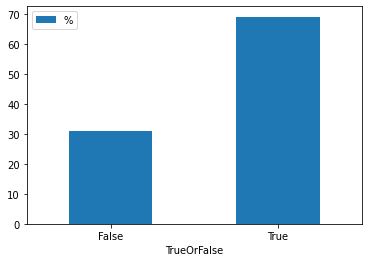

In [ ]:
# your code here
LoanCol = df["Loan_Status"]
T = (LoanCol.sum()/len(df))*100
F = 100 - T
nt = pd.DataFrame({'TrueOrFalse':['False', 'True'], '%':[F, T]})
nt.plot.bar(x='TrueOrFalse', y='%', rot=0)

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [ ]:
# your code here
LoanCol = df["Loan_Status"]
LoanCol.sum()

332

In [ ]:
# your answer here
# if all prediction is always equal to 1 we will have 100% of accuracy 
df["Loan_Status"][580]

1

6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a barplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [ ]:
def make_bar_plot(df, column):
  dataValide = df[df['Loan_Status']==1]
  dataValide = dataValide.groupby(column)['Loan_Status'].count().reset_index()
  dataValide['Pourcentage'] = (dataValide['Loan_Status']/len(df['Loan_Status']))*100
  dataValide.drop(labels='Loan_Status', axis=1,inplace=True)
  dataValide.plot.bar(column)

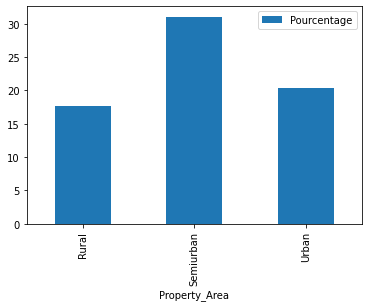

In [ ]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [ ]:
def make_box_plot(df, column):
  print(df.boxplot(column = column, by = 'Loan_Status'))

AxesSubplot(0.1,0.15;0.8x0.75)


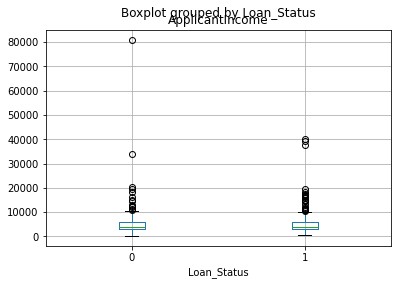

In [ ]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************
****************** Married *******************
****************** Dependents *******************
****************** Education *******************
****************** Self_Employed *******************
****************** ApplicantIncome *******************
AxesSubplot(0.1,0.15;0.8x0.75)
****************** CoapplicantIncome *******************
AxesSubplot(0.1,0.15;0.8x0.75)
****************** LoanAmount *******************
AxesSubplot(0.1,0.15;0.8x0.75)
****************** Loan_Amount_Term *******************
AxesSubplot(0.1,0.15;0.8x0.75)
****************** Credit_History *******************
AxesSubplot(0.1,0.15;0.8x0.75)
****************** Property_Area *******************
****************** Loan_Status *******************
AxesSubplot(0.1,0.15;0.8x0.75)


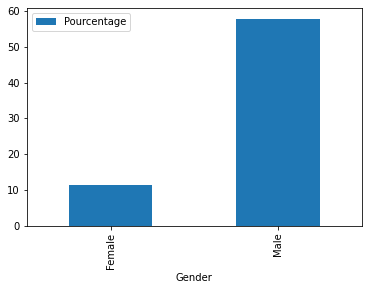

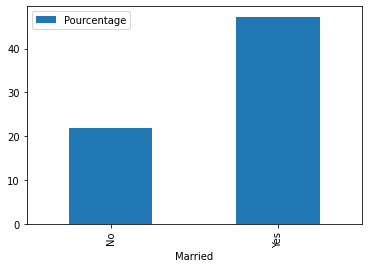

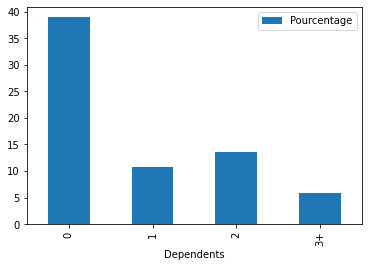

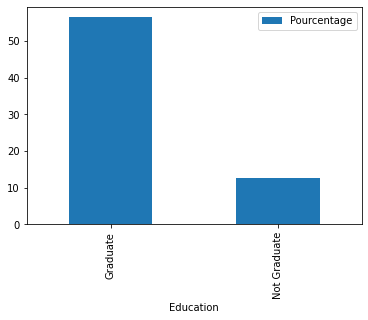

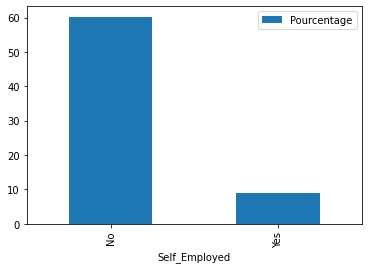

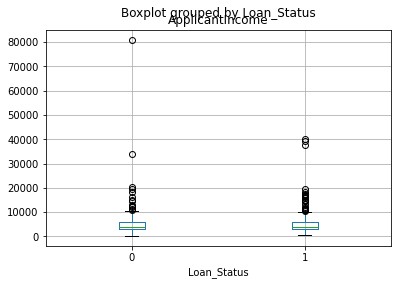

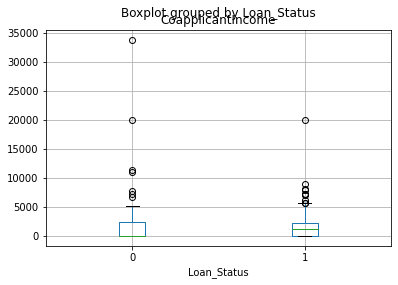

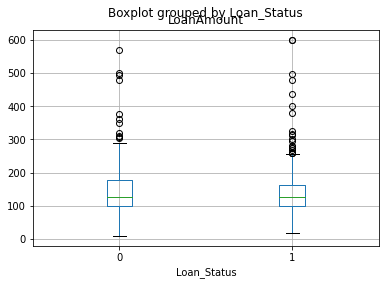

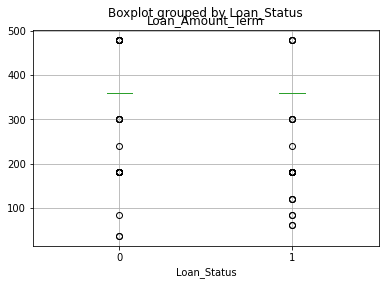

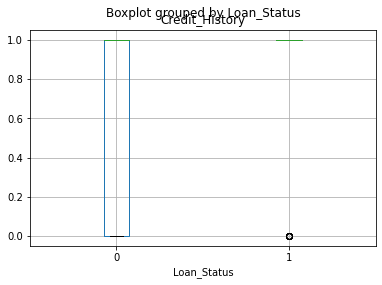

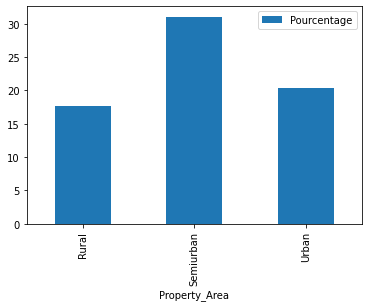

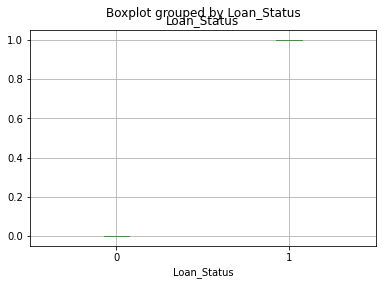

In [115]:
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    print('******************', col, '*******************')
    if(is_numeric_dtype(df[col])):
      make_box_plot(df, col)
    else:
      make_bar_plot(df, col)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [ ]:
# your code here
df = pd.get_dummies(df, columns = ["Property_Area", "Dependents"])

print the head of df

In [ ]:
# your code here
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [ ]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [ ]:
# your code here
for col in df.columns: # Loop through all columns in df
    if df[col].dtype == 'object':  # check if column's type is object (text)
        df[col] = pd.Categorical(df[col]).codes  # convert text to numerical

Print the head of df

In [ ]:
# your code here
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [ ]:
y = df['Loan_Status']
X = df
X.drop('Loan_Status', axis=1, inplace=True)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [ ]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
print("train shape", X_train.shape, y_train.shape)
print("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336,)
test shape (144, 16) (144,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [ ]:
# your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1).fit(X_train, y_train)
train_score = clf.score(X_train, y_train) # your code here
test_score = clf.score(X_test, y_test) # your code here
print('train accuracy =', train_score)
print('test accuracy =', test_score)

train accuracy = 0.7976190476190477
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[22 25]
 [ 4 93]]


In [ ]:
precision_0 = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])
recall_1 = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('precision_0 =', precision_0)
print('recall_1 =',recall_1)

precision_0 = 0.8461538461538461
recall_1 = 0.46808510638297873


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
# evaluate the model using 5-fold cross-validation
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf, X, y, scoring='f1', cv=5)
print(scores)
print('scores mean =', scores.mean(), 'scores std =', np.std(scores))

[0.87248322 0.8590604  0.8590604  0.91549296 0.86111111]
scores mean = 0.8734416191406457 scores std = 0.02160978392490238


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.